## OB 2조 프로젝트 1

**월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회**

링크 : https://dacon.io/competitions/official/235713/overview/description

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv')

변수 설명 :

https://dacon.io/competitions/official/235713/talkboard/402821

In [ ]:
# train data
print('train info\n')
train.info()

train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

In [ ]:
print('train data\n')
train.head(3)

train data



,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


In [ ]:
# 타켓 변수 확인
train.credit.unique()

array([1., 2., 0.])

In [ ]:
# test data
print('test info\n')
test.info(3)

test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 

In [ ]:
print('test data\n')
test.head(3)

test data



,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


#Preprocessing

In [ ]:
train_cleaned = train.copy()
test_cleaned = test.copy()

##Step 1. 어떤 변수에 처리가 필요한가?

findings
1. FLAG_MOBIL: 모든 행의 값이 1, drop 필요

2. child_num: 14가 3개, 19가 1개 있음, 데이터 이상으로 판단하여 이상치 처리 필요

3. occyp_type: level이 많아서 다루는 방법을 고민해야 함+결측치 다수 존재

4. 전처리 딱히 필요 없어보이는 칼럼:
car, reality, income_type, edu_type, family_type, house_type, work_phone, phone, email

5. 전처리 필요해보이는 칼럼 (주로 연속형 변수):
income_total, DAYS_BIRTH, DAYS_EMPLOYED, family_size(근데 연속형 변수 아니고 걍 정수로 다뤄도 될듯), begin_month, child_num, occyp_type


#####판단 근거
*정보는 별로 없고 코드만 기니까 접어둡시다

In [ ]:
train['car'].value_counts()

,count
car,
N,16410
Y,10047


In [ ]:
pd.crosstab(train['car'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
car,,,
N,0.12078,0.243144,0.636076
Y,0.12342,0.226635,0.649945


In [ ]:
train['reality'].value_counts()

,count
reality,
Y,17830
N,8627


In [ ]:
pd.crosstab(train['reality'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
reality,,,
N,0.123334,0.224296,0.652370
Y,0.121032,0.242961,0.636007


In [ ]:
train['child_num'].value_counts()

,count
child_num,
0,18340
1,5386
2,2362
3,306
4,47
5,10
14,3
7,2
19,1


In [ ]:
train['income_type'].value_counts()

,count
income_type,
Working,13645
Commercial associate,6202
Pensioner,4449
State servant,2154
Student,7


In [ ]:
pd.crosstab(train['income_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
income_type,,,
Commercial associate,0.126088,0.216704,0.657207
Pensioner,0.120477,0.243650,0.635873
State servant,0.123027,0.227019,0.649954
Student,0.000000,0.428571,0.571429
Working,0.120117,0.245291,0.634591


In [ ]:
train['edu_type'].value_counts()

,count
edu_type,
Secondary / secondary special,17995
Higher education,7162
Incomplete higher,1020
Lower secondary,257
Academic degree,23


In [ ]:
pd.crosstab(train['edu_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
edu_type,,,
Academic degree,0.086957,0.304348,0.608696
Higher education,0.126920,0.244485,0.628595
Incomplete higher,0.111765,0.241176,0.647059
Lower secondary,0.108949,0.229572,0.661479
Secondary / secondary special,0.120533,0.233620,0.645846


In [ ]:
train['family_type'].value_counts()

,count
family_type,
Married,18196
Single / not married,3496
Civil marriage,2123
Separated,1539
Widow,1103


In [ ]:
pd.crosstab(train['family_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
family_type,,,
Civil marriage,0.135657,0.253886,0.610457
Married,0.121620,0.227523,0.650857
Separated,0.125406,0.226771,0.647823
Single / not married,0.114989,0.268879,0.616133
Widow,0.114234,0.271079,0.614687


In [ ]:
train['house_type'].value_counts()

,count
house_type,
House / apartment,23653
With parents,1257
Municipal apartment,818
Rented apartment,429
Office apartment,190
Co-op apartment,110


In [ ]:
pd.crosstab(train['house_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
house_type,,,
Co-op apartment,0.127273,0.272727,0.600000
House / apartment,0.121465,0.235446,0.643090
Municipal apartment,0.134474,0.195599,0.669927
Office apartment,0.126316,0.252632,0.621053
Rented apartment,0.116550,0.342657,0.540793
With parents,0.120127,0.249006,0.630867


In [ ]:
train['FLAG_MOBIL'].value_counts()

,count
FLAG_MOBIL,
1,26457


In [ ]:
train['work_phone'].value_counts()

,count
work_phone,
0,20511
1,5946


In [ ]:
pd.crosstab(train['work_phone'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
work_phone,,,
0,0.121545,0.236166,0.642290
1,0.122603,0.239321,0.638076


In [ ]:
train['phone'].value_counts()

,count
phone,
0,18672
1,7785


In [ ]:
pd.crosstab(train['phone'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
phone,,,
0,0.120234,0.241538,0.638228
1,0.125498,0.225690,0.648812


In [ ]:
train['email'].value_counts()

,count
email,
0,24042
1,2415


In [ ]:
pd.crosstab(train['email'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
email,,,
0,0.122827,0.238083,0.639090
1,0.111387,0.224845,0.663768


In [ ]:
train['occyp_type'].value_counts()

,count
occyp_type,
Laborers,4512
Core staff,2646
Sales staff,2539
Managers,2167
Drivers,1575
High skill tech staff,1040
Accountants,902
Medicine staff,864
Cooking staff,457


In [ ]:
pd.crosstab(train['occyp_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
occyp_type,,,
Accountants,0.130820,0.251663,0.617517
Cleaning staff,0.099256,0.230769,0.669975
Cooking staff,0.126915,0.240700,0.632385
Core staff,0.131141,0.235072,0.633787
Drivers,0.118730,0.227302,0.653968
HR staff,0.112903,0.064516,0.822581
High skill tech staff,0.118269,0.259615,0.622115
IT staff,0.195122,0.243902,0.560976
Laborers,0.129876,0.239805,0.630319


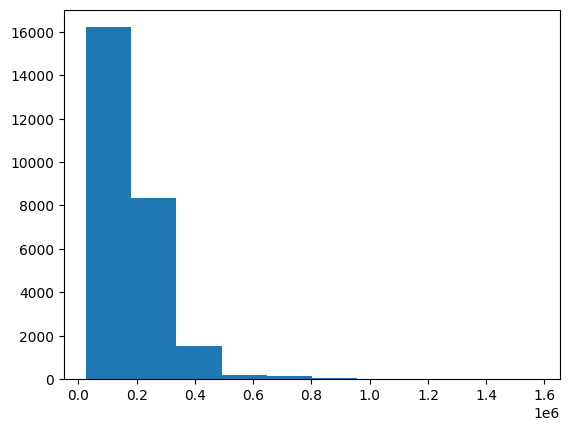

In [ ]:
plt.hist(train['income_total'])
plt.show()

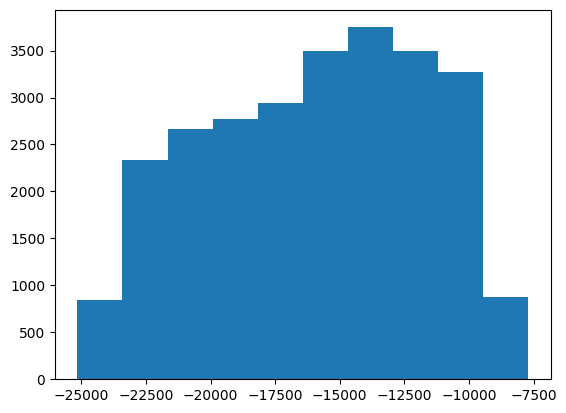

In [ ]:
plt.hist(train['DAYS_BIRTH'])
plt.show()

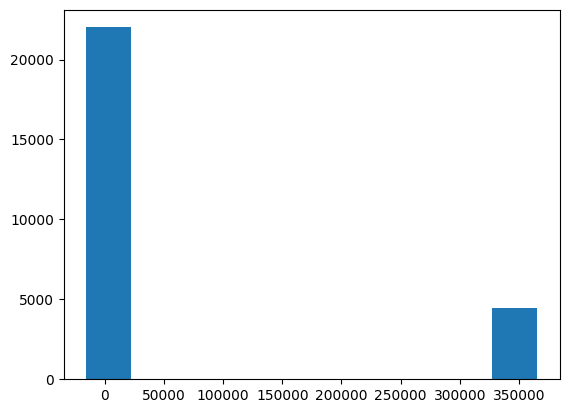

In [ ]:
plt.hist(train['DAYS_EMPLOYED'])
plt.show()

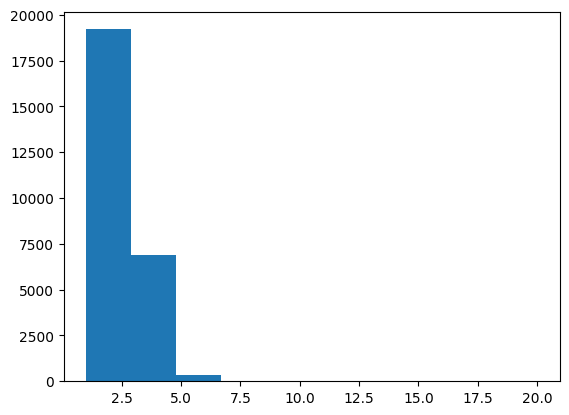

In [ ]:
plt.hist(train['family_size'])
plt.show()

In [ ]:
train['family_size'].value_counts()

,count
family_size,
2.0,14106
1.0,5109
3.0,4632
4.0,2260
5.0,291
6.0,44
7.0,9
15.0,3
9.0,2


In [ ]:
train['gender'].value_counts()

,count
gender,
F,17697
M,8760


In [ ]:
train['credit'].value_counts()

,count
credit,
2.0,16968
1.0,6267
0.0,3222


In [ ]:
train['credit'].value_counts(normalize=True)

,proportion
credit,
2.0,0.641343
1.0,0.236875
0.0,0.121783


##Step 2. 전처리 & 각 변수의 EDA

### index, FLAG_MOBIL: drop

In [ ]:
train_cleaned.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)
test_cleaned.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)

###김지원: begin_month

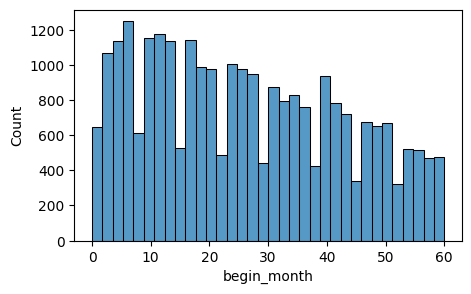

In [ ]:
#원본 데이터 그대로, -1 곱해서 양수로만 바꿔줌

train_cleaned['begin_month'] = -1 * train['begin_month']

plt.figure(figsize= (5, 3))
sns.histplot(train_cleaned['begin_month'])
plt.show()

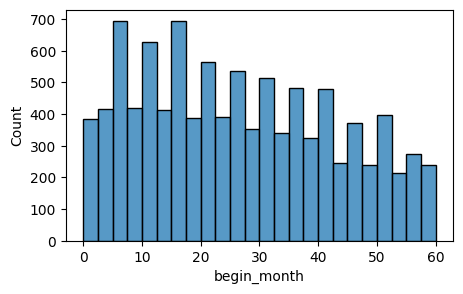

In [ ]:
test_cleaned['begin_month'] = -1 * test['begin_month']

plt.figure(figsize= (5, 3))
sns.histplot(test_cleaned['begin_month'])
plt.show()

###박유빈: occyp_type

#### 소윤 코드 일부

In [ ]:
# 다른 전처리 참고했을때 해당 셀은 양수면 0, 음수인 것들은 양수로 바꿔주더라구용
train_cleaned['DAYS_EMPLOYED'] = train_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
train_cleaned['DAYS_EMPLOYED'] = -1 * train_cleaned['DAYS_EMPLOYED']

# 하는 김에 DAYS_BIRTH도 양수로 바꿔봤어용
train_cleaned['DAYS_BIRTH'] = -1 * train_cleaned['DAYS_BIRTH']

In [ ]:
# 테스트 셋도 전처리하기!!!

# 근속년수 변수 추가시 해당 코드 실행
test_cleaned['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 0) for s in test_cleaned['DAYS_EMPLOYED']]

# DAYS_EMPLOYED 정리하기(양수는 0으로, 음수는 양수로)
test_cleaned['DAYS_EMPLOYED'] = test_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test_cleaned['DAYS_EMPLOYED'] = -1 * test_cleaned['DAYS_EMPLOYED']

# DAYS_BIRTH 정리하기 (전부 양수로)
test_cleaned['DAYS_BIRTH'] = -1 * test_cleaned['DAYS_BIRTH']



---



#### 결측치 => unknown 처리

In [ ]:
print(train['occyp_type'].isna().sum())

8171


In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

8171


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

3152


In [ ]:
print(train_cleaned.groupby('income_type')['occyp_type'].apply(lambda x: x.isna().sum()))
print(train_cleaned.groupby('edu_type')['occyp_type'].apply(lambda x: x.isna().sum()))

income_type
Commercial associate    1026
Pensioner               4440
State servant            392
Student                    1
Working                 2312
Name: occyp_type, dtype: int64
edu_type
Academic degree                    13
Higher education                 1974
Incomplete higher                 300
Lower secondary                   124
Secondary / secondary special    5760
Name: occyp_type, dtype: int64


1. income_type별 결측치 개수
- **Pensioner(연금 수령자)** 그룹에서 가장 많은 결측치 (4440개) → 은퇴자라서 직업이 없을 가능성이 큼.
- **Commercial associate, Working** 그룹도 결측치가 많음 → 특정 직군에서 데이터가 누락된 이유가 있을 수 있음.

2. edu_type별 결측치 개수
- **중등 교육(Secondary) 이상**에서 대부분의 결측치가 발생 → 직업 유형 결측치와 교육 수준 간의 직접적인 상관관계는 낮아 보임.

In [ ]:
print(train_cleaned[train_cleaned['income_type'] == 'Pensioner']['DAYS_EMPLOYED'].describe())

count    4449.000000
mean        4.196673
std       116.122881
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5521.000000
Name: DAYS_EMPLOYED, dtype: float64


- 평균이 364,335일 (~997년)
- 25%, 50%, 75% 모두 365,243일 (정확히 1000년) → 비정상인 값, DAYS_EMPLOYED = 365243이 결측치 처리 방식일 가능성
- DAYS_EMPLOYED = 365243 → 더 이상 고용되지 않은 상태(실업/퇴직자) =  **"Retired"**로 대체

In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Pensioner') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Pensioner') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
# Student, State Servant → occyp_type을 'Student', 'State Servant'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Student') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Student'
train_cleaned.loc[(train_cleaned['income_type'] == 'State servant') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'State servant'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Student') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Student'
test_cleaned.loc[(test_cleaned['income_type'] == 'State servant') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'State servant'

In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

3338


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

1297


In [ ]:
print(train_cleaned[train_cleaned['occyp_type'].isna()]['house_type'].value_counts())
print(train_cleaned[train_cleaned['occyp_type'].isna()]['family_type'].value_counts())

house_type
House / apartment      2939
With parents            223
Municipal apartment      89
Rented apartment         70
Office apartment         14
Co-op apartment           3
Name: count, dtype: int64
family_type
Married                 2368
Single / not married     443
Civil marriage           271
Separated                186
Widow                     70
Name: count, dtype: int64


3. house_type별 결측치 개수
- House / apartment(3281), **With parents(239)**에서 결측치가 많음.
→ 가족과 함께 거주하는 경우, 무직일 가능성이 더 높을 수 있음
4. family_type별 결측치 개수
- **Married(2650)**에서 가장 많은 결측치 → 기혼자는 육아나 가사로 인해 경제활동을 하지 않는 경우가 많을 수 있음

In [ ]:
# Married(기혼) + 여성 → 'Housewife'로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Married') & (train_cleaned['gender'] == 'F') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

In [ ]:
test_cleaned.loc[(test_cleaned['family_type'] == 'Married') & (test_cleaned['gender'] == 'F') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

- 기혼 여성은 육아나 가사로 인해 경제활동을 하지 않을 확률이 높음.
- 따라서 여성이고 기혼(Married)인데 occyp_type이 결측이면 → 'Housewife'로 대체

In [ ]:
# With parents(부모와 동거) → Unemployed로 대체
train_cleaned.loc[(train_cleaned['house_type'] == 'With parents') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
test_cleaned.loc[(test_cleaned['house_type'] == 'With parents') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
# 미혼(Single) + 고등 교육(Higher education 이상) → 사회초년생(Entry-level)로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Single / not married') &
          (train_cleaned['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
test_cleaned.loc[(test_cleaned['family_type'] == 'Single / not married') &
          (test_cleaned['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
# income_type별 최빈값 및 총 개수 출력
income_total_counts = train_cleaned["income_type"].value_counts()
income_mode = train_cleaned.groupby("income_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
income_mode_counts = train_cleaned.groupby("income_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

income_df = pd.DataFrame({
    "Total Count": income_total_counts,
    "Most Frequent occyp_type": income_mode,
    "Count of Most Frequent occyp_type": income_mode_counts
})
print("🔹 income_type별 최빈값 개수:")
print(income_df)

# edu_type별 최빈값 및 총 개수 출력
edu_total_counts = train_cleaned["edu_type"].value_counts()
edu_mode = train_cleaned.groupby("edu_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
edu_mode_counts = train_cleaned.groupby("edu_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

edu_df = pd.DataFrame({
    "Total Count": edu_total_counts,
    "Most Frequent occyp_type": edu_mode,
    "Count of Most Frequent occyp_type": edu_mode_counts
})
print("\n🔹 edu_type별 최빈값 개수:")
print(edu_df)

# family_type별 최빈값 및 총 개수 출력
family_total_counts = train_cleaned["family_type"].value_counts()
family_mode = train_cleaned.groupby("family_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
family_mode_counts = train_cleaned.groupby("family_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

family_df = pd.DataFrame({
    "Total Count": family_total_counts,
    "Most Frequent occyp_type": family_mode,
    "Count of Most Frequent occyp_type": family_mode_counts
})
print("\n🔹 family_type별 최빈값 개수:")
print(family_df)

🔹 income_type별 최빈값 개수:
                      Total Count Most Frequent occyp_type  \
income_type                                                  
Commercial associate         6202                 Laborers   
Pensioner                    4449                  Retired   
State servant                2154               Core staff   
Student                         7               Core staff   
Working                     13645                 Laborers   

                      Count of Most Frequent occyp_type  
income_type                                              
Commercial associate                               1075  
Pensioner                                          4440  
State servant                                       655  
Student                                               4  
Working                                            3290  

🔹 edu_type별 최빈값 개수:
                               Total Count Most Frequent occyp_type  \
edu_type                                    







[최빈값이 과반수 이상을 차지하는 경우]

1. income_type

| type                  | total | frequent        | value |
|-----------------------|-------|----------------|-------|
| Pensioner  | 4449  | Retired       | 4440  |
| Student            | 7  | Core staff        | 4  |

2. edu_type

- X

3. family_type

| type                  | total | frequent        | value |
|-----------------------|-------|----------------|-------|
| Widow  | 1103  | Retired       | 605  |


In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Pensioner') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

# Student 그룹에서 occyp_type이 NaN인 경우 'Core staff'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Student') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Core staff'

# Widow 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Widow') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Pensioner') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'
test_cleaned.loc[(test_cleaned['income_type'] == 'Student') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Core staff'
test_cleaned.loc[(test_cleaned['family_type'] == 'Widow') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

1379


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

552


<남은 결측치 개수>
- train: 1379
- test: 552

###이은주: income_total

income_total : 연간 소득

In [ ]:
train_income_total_log = np.log1p(train['income_total'])
test_income_total_log = np.log1p(test['income_total'])

In [ ]:
print(train_income_total_log.skew(), test_income_total_log.skew())

0.09233294925344264 0.10309615296904602


In [ ]:
#왜곡 처리 하는게 맞다고 팀원들이 동의하면 아래 코드 실행

train_cleaned['income_total'] = train_income_total_log
test_cleaned['income_total'] = test_income_total_log

###박소윤: DAYS_BIRTH, DAYS_EMPLOYED

In [ ]:
# 나이 변수 추가시 해당 코드 실행
train_cleaned['AGE'] = round(abs(train_cleaned['DAYS_BIRTH'])/365.5,0)

# 근속년수 변수 추가시 해당 코드 실행
# train_cleaned['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 0) for s in train_cleaned['DAYS_EMPLOYED']]

# DAYS_EMPLOYED 정리하기(양수는 0으로, 음수는 양수로)
# train_cleaned['DAYS_EMPLOYED'] = train_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
# train_cleaned['DAYS_EMPLOYED'] = -1 * train_cleaned['DAYS_EMPLOYED']

# DAYS_BIRTH 정리하기 (전부 양수로)
# train_cleaned['DAYS_BIRTH'] = -1 * train_cleaned['DAYS_BIRTH']

In [ ]:
# 테스트 셋도 전처리하기!!!

# 나이 변수 추가
test_cleaned['AGE'] = round(abs(test_cleaned['DAYS_BIRTH'])/365.5,0)

# 근속년수 변수 추가시 해당 코드 실행
# test_cleaned['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 0) for s in test_cleaned['DAYS_EMPLOYED']]

# DAYS_EMPLOYED 정리하기(양수는 0으로, 음수는 양수로)
# test_cleaned['DAYS_EMPLOYED'] = test_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
# test_cleaned['DAYS_EMPLOYED'] = -1 * test_cleaned['DAYS_EMPLOYED']

# DAYS_BIRTH 정리하기 (전부 양수로)
# test_cleaned['DAYS_BIRTH'] = -1 * test_cleaned['DAYS_BIRTH']

###한재희: family_size, child_num

In [ ]:
# 두가지 경우에 해당하는 데이터 삭제
train_cleaned = train_cleaned[train_cleaned['family_size'] > train_cleaned['child_num']]

In [ ]:
len(train_cleaned)

26451

In [ ]:
# 10731
train_cleaned.loc[train_cleaned['child_num'] == 19, ['child_num', 'family_size']] = [0, 1]

# 8462, 9021, 25390
train_cleaned = train_cleaned.drop(train_cleaned[train_cleaned['child_num'] == 14].index)

In [ ]:
# 잘 변경되었는지 확인
train_cleaned[train['family_size'] >= 9]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,AGE
10731,F,N,Y,0,11.630717,Working,Secondary / secondary special,Single / not married,House / apartment,11057,1853,1,1,0,Waiters/barmen staff,1.0,5.0,2.0,30.0
25313,F,N,N,7,11.967187,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,26.0,2.0,38.0
25638,F,N,N,7,11.967187,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,31.0,2.0,38.0


### 박유빈  : occyp_type(KNN용)

In [ ]:
# KNN을 적용할 데이터 복사
train_knn = train_cleaned.copy()
test_knn = test_cleaned.copy()

In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_knn.loc[(train_knn['income_type'] == 'Pensioner') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_knn.loc[(test_knn['income_type'] == 'Pensioner') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
# Student, State Servant → occyp_type을 'Student', 'State Servant'로 대체
train_knn.loc[(train_knn['income_type'] == 'Student') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Student'
train_knn.loc[(train_knn['income_type'] == 'State servant') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'State servant'

In [ ]:
test_knn.loc[(test_knn['income_type'] == 'Student') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Student'
test_knn.loc[(test_knn['income_type'] == 'State servant') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'State servant'

3. house_type별 결측치 개수
- House / apartment(3281), **With parents(239)**에서 결측치가 많음.
→ 가족과 함께 거주하는 경우, 무직일 가능성이 더 높을 수 있음
4. family_type별 결측치 개수
- **Married(2650)**에서 가장 많은 결측치 → 기혼자는 육아나 가사로 인해 경제활동을 하지 않는 경우가 많을 수 있음

In [ ]:
# Married(기혼) + 여성 → 'Housewife'로 대체
train_knn.loc[(train_knn['family_type'] == 'Married') & (train_knn['gender'] == 'F') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

In [ ]:
test_knn.loc[(test_knn['family_type'] == 'Married') & (test_knn['gender'] == 'F') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

- 기혼 여성은 육아나 가사로 인해 경제활동을 하지 않을 확률이 높음.
- 따라서 여성이고 기혼(Married)인데 occyp_type이 결측이면 → 'Housewife'로 대체

In [ ]:
# With parents(부모와 동거) → Unemployed로 대체
train_knn.loc[(train_knn['house_type'] == 'With parents') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
test_knn.loc[(test_knn['house_type'] == 'With parents') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
# 미혼(Single) + 고등 교육(Higher education 이상) → 사회초년생(Entry-level)로 대체
train_knn.loc[(train_knn['family_type'] == 'Single / not married') &
          (train_knn['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
test_knn.loc[(test_knn['family_type'] == 'Single / not married') &
          (test_knn['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_knn.loc[(train_knn['income_type'] == 'Pensioner') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'

# Student 그룹에서 occyp_type이 NaN인 경우 'Core staff'로 대체
train_knn.loc[(train_knn['income_type'] == 'Student') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Core staff'

# Widow 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_knn.loc[(train_knn['family_type'] == 'Widow') & (train_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_knn.loc[(test_knn['income_type'] == 'Pensioner') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'
test_knn.loc[(test_knn['income_type'] == 'Student') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Core staff'
test_knn.loc[(test_knn['family_type'] == 'Widow') & (test_knn['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
print(train_knn['occyp_type'].isna().sum())

1378


In [ ]:
print(test_knn['occyp_type'].isna().sum())

552


<남은 결측치 개수>
- train: 1379
- test: 552

In [ ]:
# 남은 결측치 'Unknown'으로 변환
train_cleaned['occyp_type'].fillna('Unknown', inplace=True)
test_cleaned['occyp_type'].fillna('Unknown', inplace=True)

##Step 4. 명목형 변수 처리

- gender, car, reality는 0, 1로 코딩
- income_type, edu_type, family_type, house_type, occyp_type은 level이 5개 이상이므로 일괄적으로 원핫 인코딩 또는 더미변수로 처리할 경우 차원의 저주 문제를 유발할 수 있음.


-> 명목형 변수 처리 논의 필요

In [ ]:
#gender, car, reality 처리

train_cleaned['gender'] = train_cleaned['gender'].replace({'F': 0, 'M': 1})
train_cleaned['car'] = train_cleaned['car'].replace({'N': 0, 'Y': 1})
train_cleaned['reality'] = train_cleaned['reality'].replace({'N': 0, 'Y': 1})

test_cleaned['gender'] = test_cleaned['gender'].replace({'F': 0, 'M': 1})
test_cleaned['car'] = test_cleaned['car'].replace({'N': 0, 'Y': 1})
test_cleaned['reality'] = test_cleaned['reality'].replace({'N': 0, 'Y': 1})

train_knn['gender'] = train_knn['gender'].replace({'F': 0, 'M': 1})
train_knn['car'] = train_knn['car'].replace({'N': 0, 'Y': 1})
train_knn['reality'] = train_knn['reality'].replace({'N': 0, 'Y': 1})

test_knn['gender'] = test_knn['gender'].replace({'F': 0, 'M': 1})
test_knn['car'] = test_knn['car'].replace({'N': 0, 'Y': 1})
test_knn['reality'] = test_knn['reality'].replace({'N': 0, 'Y': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Ordinal Encoding (순서형 변수)
edu_type_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

family_type_map = {
    'Widow': 0,
    'Single / not married': 1,
    'Separated': 2,
    'Civil marriage': 3,
    'Married': 4
}

train_cleaned['edu_type'] = train_cleaned['edu_type'].map(edu_type_map)
test_cleaned['edu_type'] = test_cleaned['edu_type'].map(edu_type_map)

train_cleaned['family_type'] = train_cleaned['family_type'].map(family_type_map)
test_cleaned['family_type'] = test_cleaned['family_type'].map(family_type_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 2️⃣ Nominal Encoding (명목형 변수)
categorical_cols = ['income_type', 'house_type', 'occyp_type']  # occyp_type도 포함
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_cleaned[col])  # train 데이터 기준 학습
    train_cleaned[col] = le.transform(train_cleaned[col])  # 변환
    test_cleaned[col] = le.transform(test_cleaned[col])  # 변환
    label_encoders[col] = le  # 변환 기준 저장 (디코딩 용도)

# 변환된 값 확인
for col, le in label_encoders.items():
    print(f"🔹 {col} 변환 기준:", dict(zip(le.classes_, le.transform(le.classes_))))

# 변환 후 결측치 개수 확인 (확인용)
print("변환 후, occyp_type 결측치 개수:", train_cleaned['occyp_type'].isna().sum())

🔹 income_type 변환 기준: {'Commercial associate': np.int64(0), 'Pensioner': np.int64(1), 'State servant': np.int64(2), 'Student': np.int64(3), 'Working': np.int64(4)}
🔹 house_type 변환 기준: {'Co-op apartment': np.int64(0), 'House / apartment': np.int64(1), 'Municipal apartment': np.int64(2), 'Office apartment': np.int64(3), 'Rented apartment': np.int64(4), 'With parents': np.int64(5)}
🔹 occyp_type 변환 기준: {'Accountants': np.int64(0), 'Cleaning staff': np.int64(1), 'Cooking staff': np.int64(2), 'Core staff': np.int64(3), 'Drivers': np.int64(4), 'Entry-level': np.int64(5), 'HR staff': np.int64(6), 'High skill tech staff': np.int64(7), 'Housewife': np.int64(8), 'IT staff': np.int64(9), 'Laborers': np.int64(10), 'Low-skill Laborers': np.int64(11), 'Managers': np.int64(12), 'Medicine staff': np.int64(13), 'Private service staff': np.int64(14), 'Realty agents': np.int64(15), 'Retired': np.int64(16), 'Sales staff': np.int64(17), 'Secretaries': np.int64(18), 'Security staff': np.int64(19), 'State serv

#### KNN을 위해 추가 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Ordinal Encoding (순서형 변수)
edu_type_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

family_type_map = {
    'Widow': 0,
    'Single / not married': 1,
    'Separated': 2,
    'Civil marriage': 3,
    'Married': 4
}

train_knn['edu_type'] = train_knn['edu_type'].map(edu_type_map)
test_knn['edu_type'] = test_knn['edu_type'].map(edu_type_map)

train_knn['family_type'] = train_knn['family_type'].map(family_type_map)
test_knn['family_type'] = test_knn['family_type'].map(family_type_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# occyp_type 결측치를 '-1'로 임시 대체 (결측치 유지)
train_knn['occyp_type'] = train_knn['occyp_type'].fillna('-1')
test_knn['occyp_type'] = test_knn['occyp_type'].fillna('-1')

# 2️⃣ Nominal Encoding (명목형 변수)
categorical_cols = ['income_type', 'house_type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_knn[col])  # train 데이터 기준 학습
    train_knn[col] = le.transform(train_knn[col])  # 변환
    test_knn[col] = le.transform(test_knn[col])  # 변환
    label_encoders[col] = le  # 변환 기준 저장 (디코딩 용도)

# occyp_type Label Encoding (복구 가능하도록)
le_occyp = LabelEncoder()
train_knn['occyp_type'] = le_occyp.fit_transform(train_knn['occyp_type'])
test_knn['occyp_type'] = le_occyp.transform(test_knn['occyp_type'])

# 변환 기준 저장
label_encoders['occyp_type'] = le_occyp

# '-1'을 다시 NaN으로 복원 (KNN을 위해)
train_knn.loc[train_knn['occyp_type'] == le_occyp.transform(['-1'])[0], 'occyp_type'] = np.nan
test_knn.loc[test_knn['occyp_type'] == le_occyp.transform(['-1'])[0], 'occyp_type'] = np.nan

# 변환된 값 확인
for col, le in label_encoders.items():
    print(f"🔹 {col} 변환 기준:", dict(zip(le.classes_, le.transform(le.classes_))))

# 변환 후 결측치 개수 확인
print("변환 후, occyp_type 결측치 개수:", train_knn['occyp_type'].isna().sum())

🔹 income_type 변환 기준: {'Commercial associate': np.int64(0), 'Pensioner': np.int64(1), 'State servant': np.int64(2), 'Student': np.int64(3), 'Working': np.int64(4)}
🔹 house_type 변환 기준: {'Co-op apartment': np.int64(0), 'House / apartment': np.int64(1), 'Municipal apartment': np.int64(2), 'Office apartment': np.int64(3), 'Rented apartment': np.int64(4), 'With parents': np.int64(5)}
🔹 occyp_type 변환 기준: {'-1': np.int64(0), 'Accountants': np.int64(1), 'Cleaning staff': np.int64(2), 'Cooking staff': np.int64(3), 'Core staff': np.int64(4), 'Drivers': np.int64(5), 'Entry-level': np.int64(6), 'HR staff': np.int64(7), 'High skill tech staff': np.int64(8), 'Housewife': np.int64(9), 'IT staff': np.int64(10), 'Laborers': np.int64(11), 'Low-skill Laborers': np.int64(12), 'Managers': np.int64(13), 'Medicine staff': np.int64(14), 'Private service staff': np.int64(15), 'Realty agents': np.int64(16), 'Retired': np.int64(17), 'Sales staff': np.int64(18), 'Secretaries': np.int64(19), 'Security staff': np.in

##Step 5. 중복 데이터 처리

동일 인물임을 결정하는 조건 : `credit`, `begin_month` 제외 나머지 특성들이 같으면 동일 인물로 보기로 함.

In [ ]:
train_cleaned.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'AGE'],
      dtype='object')

In [ ]:
test_cleaned.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'working_year', 'AGE'],
      dtype='object')

In [ ]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size','AGE']

train_cleaned['id'] = train_cleaned[cols].astype(str).agg('_'.join, axis=1)
test_cleaned['id'] = test_cleaned[cols].astype(str).agg('_'.join, axis=1)

#train_knn['id'] = train_knn[cols].astype(str).agg('_'.join, axis=1)
#test_knn['id'] = test_knn[cols].astype(str).agg('_'.join, axis=1)

In [ ]:
# 동일 id를 가진 사람이 발급 받은 카드 개수 피처 생성
train_cleaned['card_count'] = train_cleaned.groupby('id')['id'].transform('count')
test_cleaned['card_count'] = test_cleaned.groupby('id')['id'].transform('count')

#train_knn['card_count'] = train_knn.groupby('id')['id'].transform('count')
#test_knn['card_count'] = test_knn.groupby('id')['id'].transform('count')

##Step 6. 파생변수 추가


코드 공유 게시판을 보니까 시간 변수 `DAYS_BIRTH`, `DAYS_EMPLOYED`을 연속형이 아닌 일정 기준으로 월, 주로 나눈 파생 변수 활용.

소윤이가 다양한 변수들을 이미 생성해줬기 때문에 추가적으로 몇개만 작성해봤어요. 필요없는건 # 빼고 전처리해주세요!

In [ ]:
for df in [train_cleaned,test_cleaned]:
    # before_EMPLOYED : 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['before_EMPLOYED'] = df['before_EMPLOYED'].apply(lambda x: max(x, 0)) ## 음수가 나올 수 있기 때문

    #DAYS_BIRTH 파생변수 - Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
    df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
    df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)


    #DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))
    df['working_year'] = df['DAYS_EMPLOYED'] // 365.5
    df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    #ability : 소득 /(살아온 일수 + 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])

    #income_per_family : 소득 / 가족 수 ➡️ 가족원 1인당 소득
    df['income_per_famiy'] = df['income_total'] / df['family_size']

In [ ]:
for df in [train_knn,test_knn]:
    # before_EMPLOYED : 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['before_EMPLOYED'] = df['before_EMPLOYED'].apply(lambda x: max(x, 0)) ## 음수가 나올 수 있기 때문

    #DAYS_BIRTH 파생변수 - Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
    df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
    df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)


    #DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))
    df['working_year'] = df['DAYS_EMPLOYED'] // 365.5
    df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    #ability : 소득 /(살아온 일수 + 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])

    #income_per_family : 소득 / 가족 수 ➡️ 가족원 1인당 소득
    df['income_per_famiy'] = df['income_total'] / df['family_size']

## Step 7. KNN

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np


# ID 제외 후 KNN 실행
knn_features_train = train_knn
knn_features_test = test_knn

# Train과 Test에서 공통된 Feature만 선택
# 일부 train과 test 데이터의 feature 이름이 다름
common_columns = list(set(knn_features_train.columns) & set(knn_features_test.columns))

# KNN Imputer 설정 (k=5)
knn_imputer = KNNImputer(n_neighbors=5)

# Train에서 fit한 KNN을 test에도 동일하게 transform (공통 컬럼만 사용)
train_knn_imputed = knn_imputer.fit_transform(knn_features_train[common_columns])
test_knn_imputed = knn_imputer.transform(knn_features_test[common_columns])

# 다시 데이터프레임으로 변환 (공통된 컬럼만 업데이트)
train_knn.loc[:, common_columns] = train_knn_imputed
test_knn.loc[:, common_columns] = test_knn_imputed

# KNN으로 채운 occyp_type을 다시 정수로 변환
train_knn['occyp_type'] = train_knn['occyp_type'].round().astype(int)
test_knn['occyp_type'] = test_knn['occyp_type'].round().astype(int)

In [ ]:
print(train_knn['occyp_type'].isna().sum())  # 남은 결측치 개수 확인

0


In [ ]:
test_knn.occyp_type.nunique()

23

In [ ]:
print(test_knn['occyp_type'].isna().sum())  # 남은 결측치 개수 확인

0


In [ ]:
train_knn[['occyp_type']].sample(10)  # 일부 샘플 확인

,occyp_type
857,8
10879,11
8523,17
5039,4
23091,11
20835,3
14292,13
8860,5
11137,1
17103,8


In [ ]:
# KNN 적용 후에도 결측치가 아닌 행들의 값이 의미 없이 0으로 채워졌는지 확인
print(train_knn.loc[train_knn['occyp_type'].isna(), 'occyp_type'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26448 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            26448 non-null  int64  
 1   car               26448 non-null  int64  
 2   reality           26448 non-null  int64  
 3   child_num         26448 non-null  int64  
 4   income_total      26448 non-null  float64
 5   income_type       26448 non-null  int64  
 6   edu_type          26448 non-null  int64  
 7   family_type       26448 non-null  int64  
 8   house_type        26448 non-null  int64  
 9   DAYS_BIRTH        26448 non-null  int64  
 10  DAYS_EMPLOYED     26448 non-null  int64  
 11  work_phone        26448 non-null  int64  
 12  phone             26448 non-null  int64  
 13  email             26448 non-null  int64  
 14  occyp_type        26448 non-null  int64  
 15  family_size       26448 non-null  float64
 16  begin_month       26448 non-null  float64
 17

In [ ]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10000 non-null  int64  
 1   car               10000 non-null  int64  
 2   reality           10000 non-null  int64  
 3   child_num         10000 non-null  int64  
 4   income_total      10000 non-null  float64
 5   income_type       10000 non-null  int64  
 6   edu_type          10000 non-null  int64  
 7   family_type       10000 non-null  int64  
 8   house_type        10000 non-null  int64  
 9   DAYS_BIRTH        10000 non-null  int64  
 10  DAYS_EMPLOYED     10000 non-null  int64  
 11  work_phone        10000 non-null  int64  
 12  phone             10000 non-null  int64  
 13  email             10000 non-null  int64  
 14  occyp_type        10000 non-null  int64  
 15  family_size       10000 non-null  float64
 16  begin_month       10000 non-null  float64

In [ ]:
train_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26448 entries, 0 to 26456
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            26448 non-null  int64  
 1   car               26448 non-null  int64  
 2   reality           26448 non-null  int64  
 3   child_num         26448 non-null  int64  
 4   income_total      26448 non-null  float64
 5   income_type       26448 non-null  int64  
 6   edu_type          26448 non-null  int64  
 7   family_type       26448 non-null  int64  
 8   house_type        26448 non-null  int64  
 9   DAYS_BIRTH        26448 non-null  int64  
 10  DAYS_EMPLOYED     26448 non-null  int64  
 11  work_phone        26448 non-null  int64  
 12  phone             26448 non-null  int64  
 13  email             26448 non-null  int64  
 14  occyp_type        26448 non-null  int64  
 15  family_size       26448 non-null  float64
 16  begin_month       26448 non-null  float64
 17

In [ ]:
test_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10000 non-null  int64  
 1   car               10000 non-null  int64  
 2   reality           10000 non-null  int64  
 3   child_num         10000 non-null  int64  
 4   income_total      10000 non-null  float64
 5   income_type       10000 non-null  int64  
 6   edu_type          10000 non-null  int64  
 7   family_type       10000 non-null  int64  
 8   house_type        10000 non-null  int64  
 9   DAYS_BIRTH        10000 non-null  int64  
 10  DAYS_EMPLOYED     10000 non-null  int64  
 11  work_phone        10000 non-null  int64  
 12  phone             10000 non-null  int64  
 13  email             10000 non-null  int64  
 14  occyp_type        10000 non-null  int64  
 15  family_size       10000 non-null  float64
 16  begin_month       10000 non-null  float64

##Step 3. 변수 간 EDA

###변수 간 상관관계 분석

*child_num과 family_size의 상관관계가 높으므로 둘 중 하나만 사용하거나 두 변수를 적절히 조합하여 하나로 합치는 과정이 필요할 수 있음



*DAYS_BIRTH랑 DAYS_EMPLOYED도 상관관계가 높은 편이기는 하지만 뭐... 봐줘도 되지 않을까?

In [ ]:
train_corr = train.copy()
# train_corr.drop(['index', 'FLAG_MOBIL', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type'], axis = 1, inplace = True)
train_corr.drop(['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type'], axis = 1, inplace = True)

train_corr['gender'] = train_corr['gender'].replace({'F': 0, 'M': 1})
train_corr['car'] = train_corr['car'].replace({'N': 0, 'Y': 1})
train_corr['reality'] = train_corr['reality'].replace({'N': 0, 'Y': 1})

train_corr.head()

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


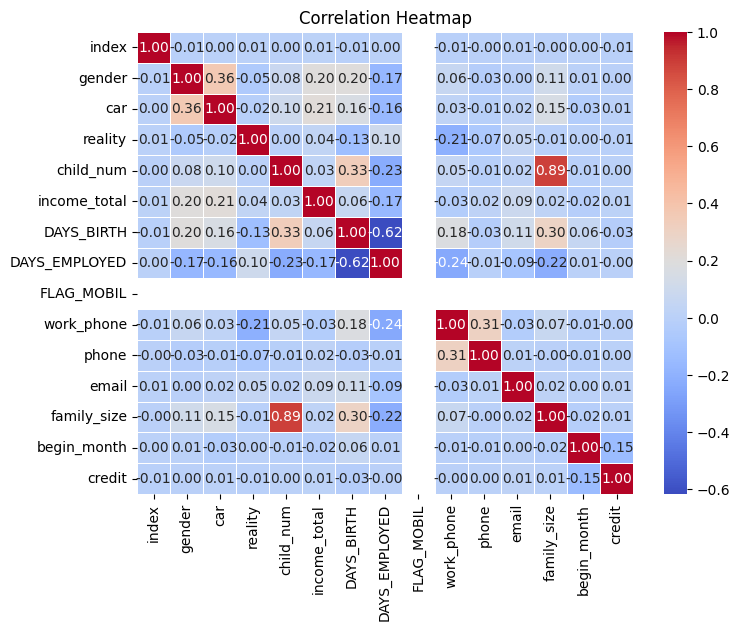

In [ ]:
#변수 간 상관관계 히트맵

plt.figure(figsize=(8, 6))
sns.heatmap(train_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

#Modeling

## train_cleaned & test_cleaned(unknown으로 채운 경우)

### 1. 다중공산성 삭제 x >> 0.75863

In [ ]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 추가적인 전처리
le = LabelEncoder()

train_cleaned['id'] = le.fit_transform(train_cleaned['id'])
test_cleaned['id'] = le.fit_transform(test_cleaned['id'])

In [ ]:
# 추가적인 전처리 : 사용하는게 더 나음
from sklearn.cluster import KMeans
kmeans_train = train_cleaned.drop(['credit'], axis=1)
test_cleaned = test_cleaned[kmeans_train.columns]
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
train_cleaned['cluster'] = kmeans.predict(kmeans_train)
test_cleaned['cluster'] = kmeans.predict(test_cleaned)

In [ ]:
train_cleaned.drop(['cluster'],axis = 1, inplace = True)
test_cleaned.drop(['cluster'],axis = 1, inplace = True)

In [ ]:
X = train_cleaned.drop(columns=['credit'])
y = train_cleaned['credit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train과 test의 칼럼 순서 맞추기
test_cleaned = test_cleaned[X.columns]

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터 설정
best_params_ = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# 최적의 하이퍼파라미터로 XGBoost 모델 생성
best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss')

# 모델 학습
best_xgb.fit(X_train, y_train)

# 예측 수행
y_pred = best_xgb.predict(X_test)

# test_cleaned의 컬럼을 X_train과 일치시킴
test_cleaned_unknown = test_cleaned[X_train.columns]

# 확률 예측
y_pred_proba = best_xgb.predict_proba(test_cleaned_unknown)

In [ ]:
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# XGBoost 모델 객체 생성
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [3, 5, 7],           # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2], # 학습률
    'subsample': [0.8, 1.0],           # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]     # 트리별 특성 샘플링 비율
}

# GridSearchCV 실행 (교차 검증 5-Fold 사용)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)


# 최적의 모델로 예측
best_xgb = best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_cleaned)
'''

'\nimport xgboost as xgb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n\n# XGBoost 모델 객체 생성\nxgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\')\n\n# 하이퍼파라미터 그리드 설정\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # 트리 개수\n    \'max_depth\': [3, 5, 7],           # 트리의 최대 깊이\n    \'learning_rate\': [0.01, 0.1, 0.2], # 학습률\n    \'subsample\': [0.8, 1.0],           # 샘플링 비율\n    \'colsample_bytree\': [0.8, 1.0]     # 트리별 특성 샘플링 비율\n}\n\n# GridSearchCV 실행 (교차 검증 5-Fold 사용)\ngrid_search = GridSearchCV(\n    estimator=xgb_model,\n    param_grid=param_grid,\n    scoring=\'accuracy\',\n    cv=5,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train, y_train)\n\n# 최적의 하이퍼파라미터 출력\nprint("Best parameters:", grid_search.best_params_)\n\n\n# 최적의 모델로 예측\nbest_xgb = best_estimator_\ny_pred = best_xgb.predict(X_test)\ny_pred_proba = best_xgb.predict_proba(test_cleaned)\n'

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('Cleaned_Data_No_Delete.csv', index=True)

In [ ]:
submission

,0,1,2
index,,,
26457,0.060575,0.212963,0.726462
26458,0.373595,0.102714,0.523691
26459,0.049117,0.142381,0.808502
26460,0.209199,0.077975,0.712826
26461,0.130399,0.198116,0.671485
...,...,...,...
36452,0.115128,0.239092,0.645780
36453,0.098290,0.230036,0.671674
36454,0.062295,0.072593,0.865112


In [ ]:
submission.shape

(10000, 3)

### 2. 다중공산성 삭제 O

In [ ]:
X = train_cleaned.drop(columns=['credit'])
y = train_cleaned['credit']

from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF 함수 불러오기

# 다중공선성이 높은 변수 제거
def remove_multicollinearity(X, threshold=10.0):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    high_vif_features = vif_data[vif_data['VIF'] > threshold]['feature'].tolist()
    print(f"Removing features with high VIF: {high_vif_features}")
    return X.drop(columns=high_vif_features, errors='ignore')

X = remove_multicollinearity(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Removing features with high VIF: ['gender', 'child_num', 'income_total', 'family_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'AGE', 'id', 'before_EMPLOYED', 'working_year', 'ability', 'income_per_famiy']


In [ ]:
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# XGBoost 모델 객체 생성
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [3, 5, 7],           # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2], # 학습률
    'subsample': [0.8, 1.0],           # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]     # 트리별 특성 샘플링 비율
}

# GridSearchCV 실행 (교차 검증 5-Fold 사용)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# X_train의 컬럼과 test_cleaned의 컬럼을 일치시킴
test_clean_unknown = test_cleaned[X_train.columns]

grid_search.best_params_ = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_clean_unknown)
'''

'\nimport xgboost as xgb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# XGBoost 모델 객체 생성\nxgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\')\n\n# 하이퍼파라미터 그리드 설정\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # 트리 개수\n    \'max_depth\': [3, 5, 7],           # 트리의 최대 깊이\n    \'learning_rate\': [0.01, 0.1, 0.2], # 학습률\n    \'subsample\': [0.8, 1.0],           # 샘플링 비율\n    \'colsample_bytree\': [0.8, 1.0]     # 트리별 특성 샘플링 비율\n}\n\n# GridSearchCV 실행 (교차 검증 5-Fold 사용)\ngrid_search = GridSearchCV(\n    estimator=xgb_model,\n    param_grid=param_grid,\n    scoring=\'accuracy\',\n    cv=5,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train, y_train)\n\n# 최적의 하이퍼파라미터 출력\nprint("Best parameters:", grid_search.best_params_)\n\n# X_train의 컬럼과 test_cleaned의 컬럼을 일치시킴\ntest_clean_unknown = test_cleaned[X_train.columns]\n\ngrid_search.best_params_ = {\'colsample_bytree\': 0.8, \'learning_rate\': 0.1, \

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터 설정
best_params_ = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# 최적의 하이퍼파라미터로 XGBoost 모델 생성
best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss')

# 모델 학습
best_xgb.fit(X_train, y_train)

# 예측 수행
y_pred = best_xgb.predict(X_test)

# test_cleaned의 컬럼을 X_train과 일치시킴
test_cleaned_unknown2 = test_cleaned[X_train.columns]

# 확률 예측
y_pred_proba = best_xgb.predict_proba(test_cleaned_unknown2)

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('Cleaned_Data_Yes_Delete.csv', index=True)

In [ ]:
submission

,0,1,2
index,,,
26457,0.087750,0.084496,0.827754
26458,0.337132,0.301969,0.360899
26459,0.071958,0.240689,0.687353
26460,0.069039,0.051721,0.879240
26461,0.166098,0.206086,0.627816
...,...,...,...
36452,0.055388,0.295020,0.649591
36453,0.108246,0.296289,0.595465
36454,0.042636,0.085337,0.872028


### 3. 다중공산성 삭제 O + 피처중요도 확인

In [ ]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# XGBoost 모델 생성
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 평가
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)

# 중요도가 높은 상위 N개 변수 선택 (예: 상위 10개)
n_top_features = 10
selected_features = feature_importance_df['Feature'][:n_top_features].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV 실행 (교차 검증 3-fold)
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_selected, y_train)

# 최적 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# X_train의 컬럼과 test_cleaned의 컬럼을 일치시킴
test_clean_unknown_2 = test_cleaned[X_train.columns]

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_clean_unknown)

Feature Importances:
             Feature  Importance
9       begin_month    0.133929
10       card_count    0.067958
3          edu_type    0.063190
11     DAYS_BIRTH_m    0.063097
6             phone    0.062821
7             email    0.062494
1           reality    0.062060
12     DAYS_BIRTH_w    0.061675
2       income_type    0.061381
5        work_phone    0.060973
8        occyp_type    0.060715
13  DAYS_EMPLOYED_m    0.060384
0               car    0.060012
4        house_type    0.059788
14  DAYS_EMPLOYED_w    0.059523
Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('Cleaned_Data_Feature_Selection.csv', index=True)

## train_knn & test_knn(knn으로 채운 경우)

### 1. 다중공산성 삭제 x >>

In [ ]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
# 추가적인 전처리 : 사용하는게 더 나음
from sklearn.cluster import KMeans
kmeans_train = train_knn.drop(['credit'], axis=1)
test_knn = test_knn[kmeans_train.columns]
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
train_knn['cluster'] = kmeans.predict(kmeans_train)
test_knn['cluster'] = kmeans.predict(test_knn)

In [ ]:
train_knn.drop(['cluster'],axis = 1, inplace = True)
test_knn.drop(['cluster'],axis = 1, inplace = True)

In [ ]:
X = train_knn.drop(columns=['credit'])
y = train_knn['credit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train과 test의 칼럼 순서 맞추기
test_knn = test_knn[X.columns]

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터 설정
best_params_ = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# 최적의 하이퍼파라미터로 XGBoost 모델 생성
best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss')

# 모델 학습
best_xgb.fit(X_train, y_train)

# 예측 수행
y_pred = best_xgb.predict(X_test)

# test_cleaned의 컬럼을 X_train과 일치시킴
test_knn1 = test_knn[X_train.columns]

# 확률 예측
y_pred_proba = best_xgb.predict_proba(test_knn1)

In [ ]:
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# XGBoost 모델 객체 생성
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [3, 5, 7],           # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2], # 학습률
    'subsample': [0.8, 1.0],           # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]     # 트리별 특성 샘플링 비율
}

# GridSearchCV 실행 (교차 검증 5-Fold 사용)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_knn)
'''

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('knn_Data_No_Delete.csv', index=True)

In [ ]:
submission

,0,1,2
index,,,
26457,0.110911,0.171327,0.717762
26458,0.368568,0.084993,0.546439
26459,0.054920,0.058938,0.886142
26460,0.110002,0.054997,0.835001
26461,0.057267,0.095386,0.847347
...,...,...,...
36452,0.106773,0.248758,0.644469
36453,0.099079,0.270479,0.630441
36454,0.057143,0.091907,0.850949


In [ ]:
submission.shape

(10000, 3)

### 2. 다중공산성 삭제 O

In [ ]:
X = train_knn.drop(columns=['credit'])
y = train_knn['credit']

from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF 함수 불러오기

# 다중공선성이 높은 변수 제거
def remove_multicollinearity(X, threshold=10.0):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    high_vif_features = vif_data[vif_data['VIF'] > threshold]['feature'].tolist()
    print(f"Removing features with high VIF: {high_vif_features}")
    return X.drop(columns=high_vif_features, errors='ignore')

X = remove_multicollinearity(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Removing features with high VIF: ['child_num', 'income_total', 'family_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'AGE', 'before_EMPLOYED', 'working_year', 'ability', 'income_per_famiy']


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터 설정
best_params_ = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# 최적의 하이퍼파라미터로 XGBoost 모델 생성
best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss')

# 모델 학습
best_xgb.fit(X_train, y_train)

# 예측 수행
y_pred = best_xgb.predict(X_test)

# test_cleaned의 컬럼을 X_train과 일치시킴
test_knn2 = test_knn[X_train.columns]

# 확률 예측
y_pred_proba = best_xgb.predict_proba(test_knn2)

In [ ]:
'''
# XGBoost 모델 생성
model = xgb.XGBClassifier(random_state=42)

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [3, 6, 9],           # 트리 깊이
    'learning_rate': [0.01, 0.1, 0.2], # 학습률
    'subsample': [0.8, 1.0],          # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]    # 트리별 사용할 feature 비율
}

# GridSearchCV 실행 (교차 검증 3-fold)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 지표
    cv=3,                # 교차 검증 3-폴드
    n_jobs=-1,           # 모든 CPU 사용
    verbose=2            # 진행 상황 출력
)

# 학습 진행
grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# X_train의 컬럼과 test_cleaned의 컬럼을 일치시킴
test_clean_knn = test_cleaned[X_train.columns]

grid_search.best_params_ = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_clean_knn)
'''

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('Knn_Data_Yes_Delete.csv', index=True)

In [ ]:
submission

,0,1,2
index,,,
26457,0.055907,0.099732,0.844360
26458,0.447113,0.206794,0.346093
26459,0.051894,0.206879,0.741227
26460,0.042260,0.142294,0.815446
26461,0.110823,0.101780,0.787397
...,...,...,...
36452,0.122907,0.205830,0.671263
36453,0.099572,0.228348,0.672080
36454,0.021022,0.062900,0.916077


In [ ]:
submission.shape

(10000, 3)

### 3. 다중공산성 삭제 O + 피처중요도 확인

In [ ]:
# XGBoost 모델 생성
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 평가
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)

# 중요도가 높은 상위 N개 변수 선택 (예: 상위 10개)
n_top_features = 10
selected_features = feature_importance_df['Feature'][:n_top_features].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV 실행 (교차 검증 3-fold)
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_selected, y_train)

# 최적 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# X_train의 컬럼과 test_cleaned의 컬럼을 일치시킴
test_clean_knn_2 = test_cleaned[X_train.columns]

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(test_clean_knn_2)

#### Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = y_pred_proba

submission.to_csv('Knn_Data_Feature_Selection.csv', index=False)